### **Bibliotecas Necessárias**

In [8]:
from ortools.linear_solver import pywraplp
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np


### **Instancia o GLOP(Google Linear Optimization Package) solver**

In [9]:
solver = pywraplp.Solver.CreateSolver('GLOP')


### **Crie as duas variáveis ​​e deixe-as assumir qualquer valor não negativo.**

In [10]:
x1 = solver.NumVar(0, solver.infinity(), 'x1')
x2 = solver.NumVar(0, solver.infinity(), 'x2')
x3 = solver.NumVar(0, solver.infinity(), 'x3')

### **Definição das Restrições**

In [11]:
solver.Add(0.1 * x1 + 0.2 * x2 >= 2)
solver.Add(0.4 * x1 + 0.6 * x2 >= 64)
solver.Add(0.5 * x1 + 0.2 * x2 >= 34)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x70198b526700> >

### **Definição da Função Objetivo**

In [12]:
solver.Minimize(0.006 * x1 + 0.008 * x2)


### **Checa se Existe Solução**

In [13]:
status = solver.Solve()
if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
    print ( "#"*72) 
    print ( "# Resultado Obtido para as Variáveis do Problema ")   
    print ( "#"*72) 
    print ( "# Objetivo .: ", solver.Objective().Value())
    print ( "# x1 .......: ", x1.solution_value())
    print ( "# x2 .......: ", x2.solution_value())
    print ( "#"*72)
    
    print ()
    print ( "#"*72)
    print ( "# Resumo Operacional ") 
    print ( "#"*72)    

    print (f"# Versão do Solver .......: {solver.SolverVersion()}")
    print (f"# Número de Variáveis ....: {solver.NumVariables()}")
    print (f"# Número de Restrições ...: {solver.NumConstraints()}")
    print ( "# Gasto de Tempo .........:", solver.wall_time(), "Milissegundo ")
    print ( "# Intereções Necessárias .:", solver.iterations(), "Intereções")
    print ( "#"*72)    
else:
    print ( "#"*72) 
    print('O problema não tem uma solução ótima.')
    print ( "#"*72) 

########################################################################
# Resultado Obtido para as Variáveis do Problema 
########################################################################
# Objetivo .:  0.8763636363636363
# x1 .......:  34.54545454545455
# x2 .......:  83.63636363636363
########################################################################

########################################################################
# Resumo Operacional 
########################################################################
# Versão do Solver .......: Glop solver v9.10.4067
# Número de Variáveis ....: 3
# Número de Restrições ...: 3
# Gasto de Tempo .........: 33 Milissegundo 
# Intereções Necessárias .: 2 Intereções
########################################################################


### **Visão Gráfica da Solução**

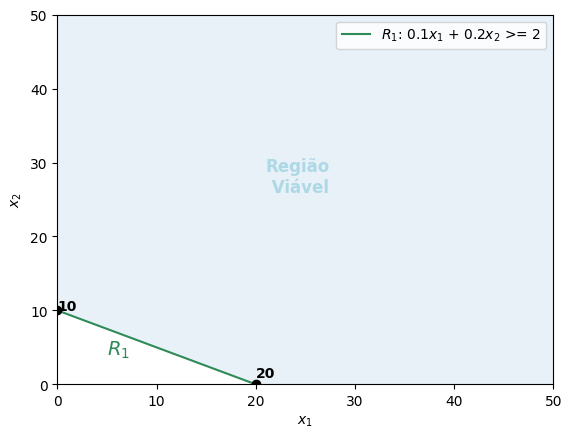

In [14]:
fig, ax = plt.subplots()

ax.set_xlim(0,50)
ax.set_ylim(0,50)
x1 = np.linspace(0, 50)

ax.plot(x1, (2-0.1*x1)/0.2, label="$R_1$: 0.1$x_1$ + 0.2$x_2$ >= 2", color="seagreen")
ax.text(5, 4, '$R_1$', fontsize = 14, color="seagreen", fontweight="bold")
ax.text(21, 26, 'Região\n Viável', fontsize = 12, color="lightblue", fontweight="bold")

ax.plot(20, 0, "o", color="black")
ax.text(20, 1, '20', fontsize = 10, color="black", fontweight="bold")

ax.plot(0, 10, "o", color="black")
ax.text(0, 10, '10', fontsize = 10, color="black", fontweight="bold")

feasible_set = Polygon(np.array([[0, 10],[0, 50],[50, 50],[50, 0],[20, 0]]), alpha=0.1)
ax.add_patch(feasible_set)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.legend()

plt.show()

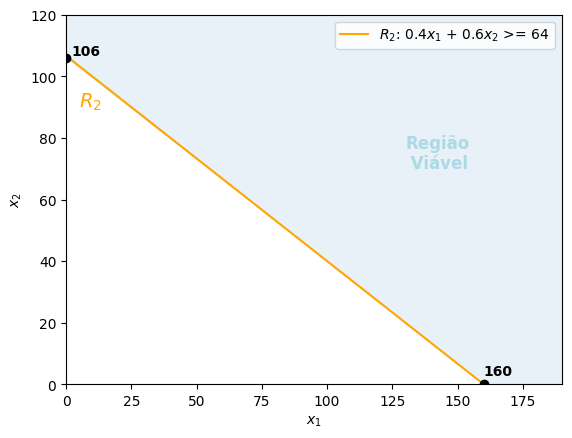

In [15]:
fig, ax = plt.subplots()

ax.set_xlim(0,190)
ax.set_ylim(0,120)
x1 = np.linspace(0, 190)

ax.plot(x1, (64-0.4*x1)/0.6, label="$R_2$: 0.4$x_1$ + 0.6$x_2$ >= 64", color="orange")

ax.text(5, 90, '$R_2$', fontsize = 14, color="orange", fontweight="bold")
ax.text(130, 70, 'Região\n Viável', fontsize = 12, color="lightblue", fontweight="bold")

ax.plot(0, 106, "o", color="black")
ax.text(2, 107, '106', fontsize = 10, color="black", fontweight="bold")

ax.plot(160, 0, "o", color="black")
ax.text(160, 3, '160', fontsize = 10, color="black", fontweight="bold")

feasible_set = Polygon(np.array([[0, 106],[0, 120],[190, 120],[190, 0],[160, 0]]), alpha=0.1)
ax.add_patch(feasible_set)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.legend()

plt.show()

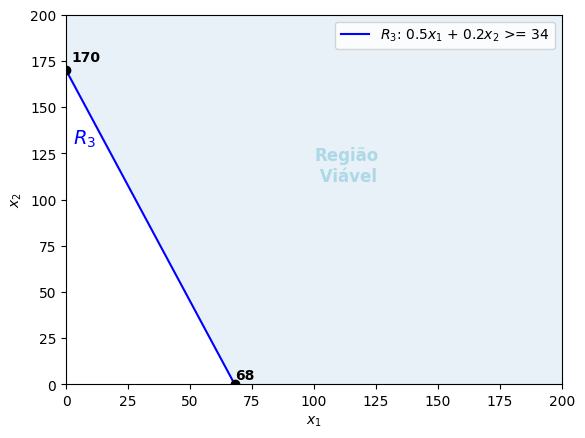

In [16]:
fig, ax = plt.subplots()

ax.set_xlim(0,200)
ax.set_ylim(0,200)
x1 = np.linspace(0, 200)

ax.plot(x1, (34-0.5*x1)/0.2, label="$R_3$: 0.5$x_1$ + 0.2$x_2$ >= 34", color="blue")

ax.text(3, 130, '$R_3$', fontsize = 14, color="blue", fontweight="bold")
ax.text(100, 110, 'Região\n Viável', fontsize = 12, color="lightblue", fontweight="bold")

ax.plot(0, 170, "o", color="black")
ax.text(2, 175, '170', fontsize = 10, color="black", fontweight="bold")

ax.plot(68, 0, "o", color="black")
ax.text(68, 3, '68', fontsize = 10, color="black", fontweight="bold")

feasible_set = Polygon(np.array([[0, 170],[0, 200],[200, 200],[200, 0], [68,0]]), alpha=0.1)
ax.add_patch(feasible_set)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.legend()

plt.show()

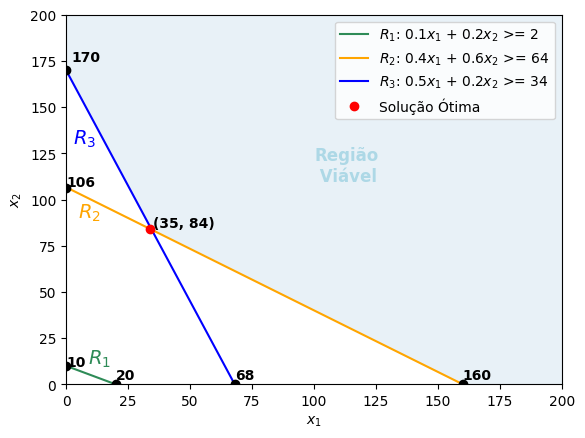

In [17]:
fig, ax = plt.subplots()

ax.set_xlim(0,200)
ax.set_ylim(0,200)
x1 = np.linspace(0, 200)

ax.plot(x1, (2-0.1*x1)/0.2, label="$R_1$: 0.1$x_1$ + 0.2$x_2$ >= 2", color="seagreen")
ax.plot(x1, (64-0.4*x1)/0.6, label="$R_2$: 0.4$x_1$ + 0.6$x_2$ >= 64", color="orange")
ax.plot(x1, (34-0.5*x1)/0.2, label="$R_3$: 0.5$x_1$ + 0.2$x_2$ >= 34", color="blue")

ax.text(9, 11, '$R_1$', fontsize = 14, color="seagreen", fontweight="bold")
ax.text(5, 90, '$R_2$', fontsize = 14, color="orange", fontweight="bold")
ax.text(3, 130, '$R_3$', fontsize = 14, color="blue", fontweight="bold")
ax.text(100, 110, 'Região\n Viável', fontsize = 12, color="lightblue", fontweight="bold")

ax.plot(0, 10, "o", color="black")
ax.text(0, 107, '106', fontsize = 10, color="black", fontweight="bold")

ax.plot(20, 0, "o", color="black")
ax.text(20, 3, '20', fontsize = 10, color="black", fontweight="bold")

ax.plot(0, 106, "o", color="black")
ax.text(0, 10, '10', fontsize = 10, color="black", fontweight="bold")

ax.plot(160, 0, "o", color="black")
ax.text(160, 3, '160', fontsize = 10, color="black", fontweight="bold")

ax.plot(0, 170, "o", color="black")
ax.text(2, 175, '170', fontsize = 10, color="black", fontweight="bold")

ax.plot(68, 0, "o", color="black")
ax.text(68, 3, '68', fontsize = 10, color="black", fontweight="bold")

ax.plot(34, 84, "o", label="Solução Ótima", color="red")
ax.text(35, 85, '(35, 84)', fontsize = 10, color="black", fontweight="bold")

feasible_set = Polygon(np.array([[34, 84],[0, 170],[0, 200],[200, 200], [200,0], [160,0]]), alpha=0.1)
ax.add_patch(feasible_set)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.legend()

plt.show()

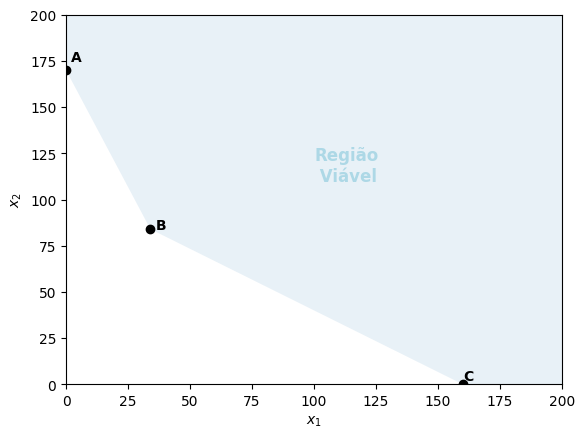

In [24]:
fig, ax = plt.subplots()

ax.set_xlim(0,200)
ax.set_ylim(0,200)
x1 = np.linspace(0, 200)

ax.text(100, 110, 'Região\n Viável', fontsize = 12, color="lightblue", fontweight="bold")
ax.plot(0, 170, "o", color="black")
ax.text(2, 175, 'A', fontsize = 10, color="black", fontweight="bold")

ax.plot(34, 84, "o", color="black")
ax.text(36, 84, 'B', fontsize = 10, color="black", fontweight="bold")

ax.plot(160, 0, "o", color="black")
ax.text(160, 2, 'C', fontsize = 10, color="black", fontweight="bold")

feasible_set = Polygon(np.array([[34, 84],[0, 170],[0, 200],[200, 200], [200,0], [160,0]]), alpha=0.1)
ax.add_patch(feasible_set)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

plt.show()

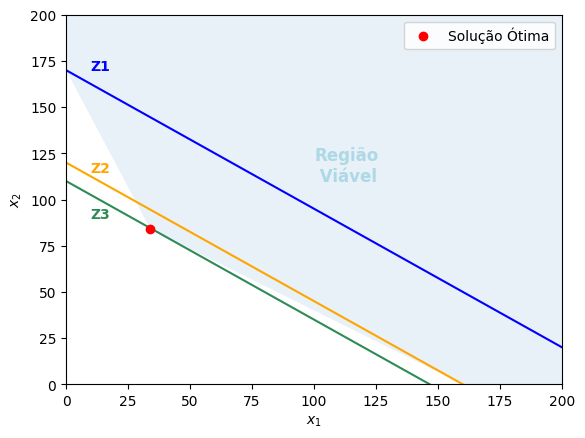

In [11]:
fig, ax = plt.subplots()

ax.set_xlim(0,200)
ax.set_ylim(0,200)
x1 = np.linspace(0, 200)

ax.plot(x1, (0.88 - (0.006*x1)) / 0.008, color="seagreen")
ax.plot(x1, (0.96 - (0.006*x1)) / 0.008, color="orange")
ax.plot(x1, (1.36 - (0.006*x1)) / 0.008, color="blue")

ax.text(100, 110, 'Região\n Viável', fontsize = 12, color="lightblue", fontweight="bold")
ax.text(10, 170, 'Z1', fontsize = 10, color="blue", fontweight="bold")
ax.text(10, 115, 'Z2', fontsize = 10, color="orange", fontweight="bold")
ax.text(10, 90, 'Z3', fontsize = 10, color="seagreen", fontweight="bold")

ax.plot(34, 84, "o", label="Solução Ótima", color="red")

feasible_set = Polygon(np.array([[34, 84],[0, 170],[0, 200],[200, 200], [200,0], [160,0]]), alpha=0.1)
ax.add_patch(feasible_set)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.legend()

plt.show()